https://catalog.data.gov/dataset?tags=real-time

https://www.google.com/finance
    

In [1]:
import requests, re
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display, HTML
#from pandas.io.json import json_normalize

In [2]:
#https://github.com/redklouds/Finviz-API/blob/master/finviz.py
#request = requests.get('http://finviz.com/')

class FinViz:

    def __init__(self):
        """
        Function Name: Default Constructor
        PRECONDITIONS: None
        POSTCONDITIONS: 
            ->Initializes the object data at the current time
        ASSUMPTIONS: None
        """
        #make the request
        request = requests.get('http://finviz.com/')
        #maxe the soup
        soup = BeautifulSoup(request.text,'html5lib')
        #soup has been brewed
        self._html = soup
        #self._html = BeautifulSoup(requests.get('http://finviz.com/').text,'html5lib')
        self._data = list()


    def refresh(self):
        """
            Function Name: refresh
            Descriptions:
                -> Polls the webservice for new/updated data
            PRECONDITIONS: None
            POSTCONDITIONS: 
                -> Object reinitialized with new data
            ASSUMPTIONS: None
        """        
        self.__reinitialize()
    
    def __reinitialize(self):
        """
            Function Name: (Helper) _reinitialize 
            Description:
                -> calls another get requsests to poll refreshed data manually
            PRECONDITIONS: None
            POSTCONDITIONS: 
                -> Refreshes data
            ASSUMPTIONS: None
        """        
        request = requests.get('http://finviz.com/')
        #maxe the soup
        soup = BeautifulSoup(request.text,'html5lib')
        #soup has been brewed
        self._html = soup
        #self._html = BeautifulSoup(requests.get('http://finviz.com/').text,'html5lib')
        self._data = list()


    def _parseColumnData(self, data):
        """
            Function Name: 
            PRECONDITIONS:
            POSTCONDITIONS:
            ASSUMPTIONS:
        """        
        ret_data = data.findChild()
        ret_data = list(ret_data.children)
        result = list()
        for idx in ret_data:
            try:
                #parse the given data, into 
                result.append(self._parseText(idx.getText()))                
            except:
                #None Type, scrapping None Object, skip.
                pass
        return result  

    def _parseText(self, text):
        """
            Function Name: 
            PRECONDITIONS:
            POSTCONDITIONS:
            ASSUMPTIONS:
        """        
        #use regex for faster parsing of text, searching
        #for numbers and words, better and faster.

        #define regEx pattern
        #"find all alpha upper and lower words
        #+ one and unlimited timees
        #match words who may or may not have spcaes betweent hem and
        #are mixed caes zero to unliited times
        regExText = '[A-Z a-z]+'
        #match a number with at least 1 to unlimited length
        ##the number must have a period and 1 through 2 numbers after it
        #match fully if there is a '+' OR '-' ZERO or 1 times
        regExDigit = '(\+|-?\d+.\d{1,2})'
        #regExDigit = '(\d+.\d{1,2})'
        listText = re.findall(regExText, text)
        listDigit = re.findall(regExDigit, text)
        resultSet = {
                     'index':listText[0],
                     'price':listDigit[0],
                     'change':listDigit[1],
                     'volume':listDigit[2],
                     'signal':listText[1]
                     }
        #return the resulting dictionary
        return resultSet
    
    def getLeftColumn(self):
        """
            Function Name: getLeftColumn
            Description:
                -> get get's the raw data in the left column of the website
            PRECONDITIONS: None
            POSTCONDITIONS:
                ->returns a dictionary containing all the parsed data
                -> in the form:
                    Stock Index
                    Current Price
                    Percent Change
                    Volume
                    Signal
            ASSUMPTIONS: None
        """        
        data = self._getMainColumnData(0)
        a = self._parseColumnData(data)
        return a
        
    def getRightColumn(self):
        """
            Function Name: getLeftColumn
            Description:
                -> get get's the raw data in the right column of the website
            PRECONDITIONS: None
            POSTCONDITIONS:
                ->returns a dictionary containing all the parsed data
                -> in the form:
                    Earnings before
                    Stock Index
                    Current Price
                    Percent Change
                    Volume Signal
            ASSUMPTIONS: None
        """  
        data = self._getMainColumnData(1)
        a = self._parseColumnData(data)
        return a

    def _getMainColumnData(self,column):
        """
            Function Name: _getMainColumnData
            Description:
               -> our switch helper function depending on which 
               parameter we get, this function returns the respective data set
               pertaining to that column
               
            PRECONDITIONS: Integer 1 or 0( left will be 0, 1 will be right)
            POSTCONDITIONS:
                Left:
                Top Gainers
                New high
                Overbought
                Unusual Volume
                Upgrades
                Earnings Before
        
                The column on the right are:
                Top Losers
                New Low
                Oversold
                Most Volitile
                Most Active
                Downgrades
                Earnings After
                Insider Selling
            ASSUMPTIONS: None
        """        
        #scrape the specific elements
        searchResult = self._html.findAll('table', {'class':'t-home-table'})
        
        # we just want the first or second matches
        return searchResult[column]
        
    def marketStatus():
        """
            TODO: get Market status |Positive|Negative
            Function Name: 
            PRECONDITIONS:
            POSTCONDITIONS:
            ASSUMPTIONS:
        """        
        pass
    def getTrends(self):
        left_col = self.getLeftColumn()
        right_col = self.getRightColumn()
        
        combined_dict = list()
  
        for i in left_col:
            combined_dict.append(i)
        for i in right_col:
            combined_dict.append(i)
            
        #print(combined_dict)
        #return_dict = {"right_column": right_col, "left_column":left_col}
        return combined_dict



In [3]:
testObject = FinViz()
data = testObject.getTrends()
df = pd.DataFrame(data)
df['change'] = df['change'].astype(float)
df['price'] = df['price'].astype(float)
df['volume'] = df['volume'].astype(int)
df.head()

,change,index,price,signal,volume
0,41.53,UXIN,2.76,Top Gainers,31403058
1,20.41,SFS,6.49,Top Gainers,13023326
2,12.86,BOXL,3.68,Top Gainers,628626
3,12.32,MARK,1.46,Top Gainers,301840
4,12.23,VVUS,3.82,Top Gainers,451975


In [4]:
testObject.refresh()
data = testObject.getTrends()
df2 = pd.DataFrame(data)
df2['change'] = df2['change'].astype(float)
df2['price'] = df2['price'].astype(float)
df2['volume'] = df2['volume'].astype(int)
df2.head()


,change,index,price,signal,volume
0,41.53,UXIN,2.76,Top Gainers,31403058
1,20.41,SFS,6.49,Top Gainers,13023326
2,12.86,BOXL,3.68,Top Gainers,628626
3,12.32,MARK,1.46,Top Gainers,301840
4,12.23,VVUS,3.82,Top Gainers,451975


In [5]:
testObject.refresh()
data = testObject.getTrends()
df3 = pd.DataFrame(data)
df3['change'] = df3['change'].astype(float)
df3['price'] = df3['price'].astype(float)
df3['volume'] = df3['volume'].astype(int)
df3.head()

,change,index,price,signal,volume
0,41.53,UXIN,2.76,Top Gainers,31403058
1,20.41,SFS,6.49,Top Gainers,13023326
2,12.86,BOXL,3.68,Top Gainers,628626
3,12.32,MARK,1.46,Top Gainers,301840
4,12.23,VVUS,3.82,Top Gainers,451975


In [6]:
df.index

RangeIndex(start=0, stop=38, step=1)

In [7]:
import math
import random
import matplotlib.pyplot as plt

price = df['price']
price2 = df2['price']
x = df['index']
fig = plt.figure(figsize=(5,7)) 

plt.scatter(price,x, color = 'r')
plt.scatter(price2,x, color = 'b')
plt.xlabel('Price')
plt.ylabel('Ticker')
#plt.savefig('test.png')
plt.show()


<Figure size 500x700 with 1 Axes>

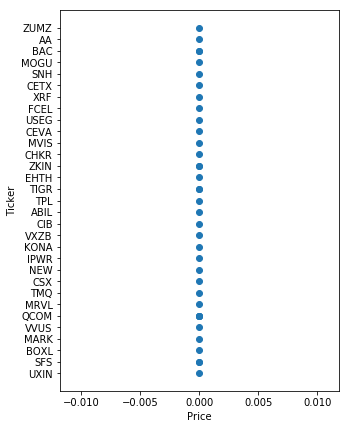

In [8]:
#plot price of df vs df2

import math
import random
import matplotlib.pyplot as plt

price = df['price'] - df2['price']
price2 = df2['price']
x = df['index']
fig = plt.figure(figsize=(5,7)) 

plt.scatter(price, x)
plt.xlabel('Price')
plt.ylabel('Ticker')
#plt.savefig('test.png')
plt.show()


In [9]:
group = df2.groupby(["signal"])
for key,item in group:
    display(HTML(group.get_group(key).to_html()))
    
df2['signal'].value_counts()

,change,index,price,signal,volume
35,-0.19,BAC,29.82,Downgrades,37026040


,change,index,price,signal,volume
36,0.97,AA,27.99,Earnings After,1916326


,change,index,price,signal,volume
17,0.42,ABIL,1.7,Earnings Before,20153


,change,index,price,signal,volume
18,-0.76,TPL,875.26,Insider Buying,2540


,change,index,price,signal,volume
37,-0.55,ZUMZ,26.4,Insider Selling,139521


,change,index,price,signal,volume
33,11.03,QCOM,78.22,Most Active,100151289
34,-0.19,BAC,29.82,Most Active,37026040


,change,index,price,signal,volume
31,-18.18,ZKIN,1.62,Most Volatile,2304239
32,-21.77,TIGR,17.21,Most Volatile,3759706


,change,index,price,signal,volume
6,11.03,QCOM,78.22,New High,100151289
7,3.62,MRVL,24.88,New High,14014399
8,4.65,TMQ,2.70,New High,390125
9,4.88,CSX,79.59,New High,3816759


,change,index,price,signal,volume
25,-11.68,USEG,0.57,New Low,158489
26,-10.34,FCEL,0.22,New Low,4168924
27,-20.44,XRF,0.70,New Low,324789
28,-11.95,CETX,0.40,New Low,354713


,change,index,price,signal,volume
10,9.98,NEW,12.01,Overbought,703456
11,11.03,QCOM,78.22,Overbought,100151289


,change,index,price,signal,volume
29,-3.53,SNH,8.11,Oversold,1468376
30,-1.49,MOGU,8.57,Oversold,15098


,change,index,price,signal,volume
0,41.53,UXIN,2.76,Top Gainers,31403058
1,20.41,SFS,6.49,Top Gainers,13023326
2,12.86,BOXL,3.68,Top Gainers,628626
3,12.32,MARK,1.46,Top Gainers,301840
4,12.23,VVUS,3.82,Top Gainers,451975
5,11.03,QCOM,78.22,Top Gainers,100151289


,change,index,price,signal,volume
19,-21.77,TIGR,17.21,Top Losers,3759706
20,-20.54,EHTH,51.99,Top Losers,1312163
21,-18.18,ZKIN,1.62,Top Losers,2304239
22,-16.48,CHKR,1.42,Top Losers,61560
23,-16.05,MVIS,1.00,Top Losers,1257366
24,-15.84,CEVA,23.38,Top Losers,609939


,change,index,price,signal,volume
12,90.50,IPWR,0.78,Unusual Volume,21962051
13,22.41,KONA,0.71,Unusual Volume,2567968
14,20.41,SFS,6.49,Unusual Volume,13023326
15,0.57,VXZB,17.78,Unusual Volume,252523


,change,index,price,signal,volume
16,0.71,CIB,52.43,Upgrades,59124


Top Losers         6
Top Gainers        6
New High           4
Unusual Volume     4
New Low            4
Most Volatile      2
Overbought         2
Oversold           2
Most Active        2
Upgrades           1
Earnings Before    1
Insider Buying     1
Earnings After     1
Downgrades         1
Insider Selling    1
Name: signal, dtype: int64

In [10]:
"""
%%html
testObject._html
display(HTML(str(testObject._html)))
"""

'\n%%html\ntestObject._html\ndisplay(HTML(str(testObject._html)))\n'

In [11]:
"""
%whos          #gives variable and types used
%lsmagic       #commands

"""

'\n%whos          #gives variable and types used\n%lsmagic       #commands\n\n'

make a list for each category (ie volume, index, etc) and append the values associated with them. then make a dictionary containing all of the lists and add that to a dataframe